In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.inspection import permutation_importance

# Load dataset 
df = pd.read_csv("C:/Users/arrow/OneDrive/Documents/GitHub/data-science-summer-2025/data/All Data Imported.csv") 
target_col = "ordering"              

# Clean and split data
df = df.dropna()
X_all = df.drop(columns=target_col).select_dtypes(include=[np.number])
y_all = LabelEncoder().fit_transform(df[target_col])
target_names = np.unique(df[target_col])
feature_names = X_all.columns

# 60% training / 20% validation / 20% testing split
n = len(df)
n_train = int(0.6 * n)
n_val = int(0.2 * n)

X_train = X_all.iloc[:n_train]
y_train = y_all[:n_train]

X_val = X_all.iloc[n_train:n_train + n_val]
y_val = y_all[n_train:n_train + n_val]

X_test = X_all.iloc[n_train + n_val:]
y_test = y_all[n_train + n_val:]

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [4]:


# Evaluate on validation and test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")


print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=target_names))


Validation Accuracy: 0.4637
Test Accuracy: 0.5221

Classification Report (Test Set):
              precision    recall  f1-score   support

         AFM       0.07      0.66      0.13       567
          FM       0.48      0.21      0.30      6415
         FiM       0.09      0.03      0.04       599
          NM       0.77      0.74      0.75     10273

    accuracy                           0.52     17854
   macro avg       0.35      0.41      0.31     17854
weighted avg       0.62      0.52      0.54     17854



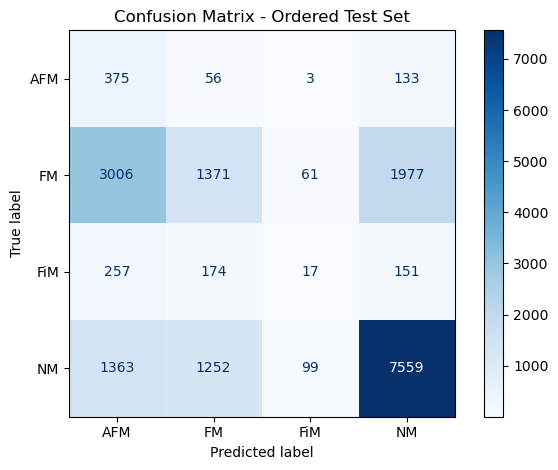

In [5]:


# Confusion Matrix for Test Set
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Ordered Test Set")
plt.tight_layout()
plt.show()


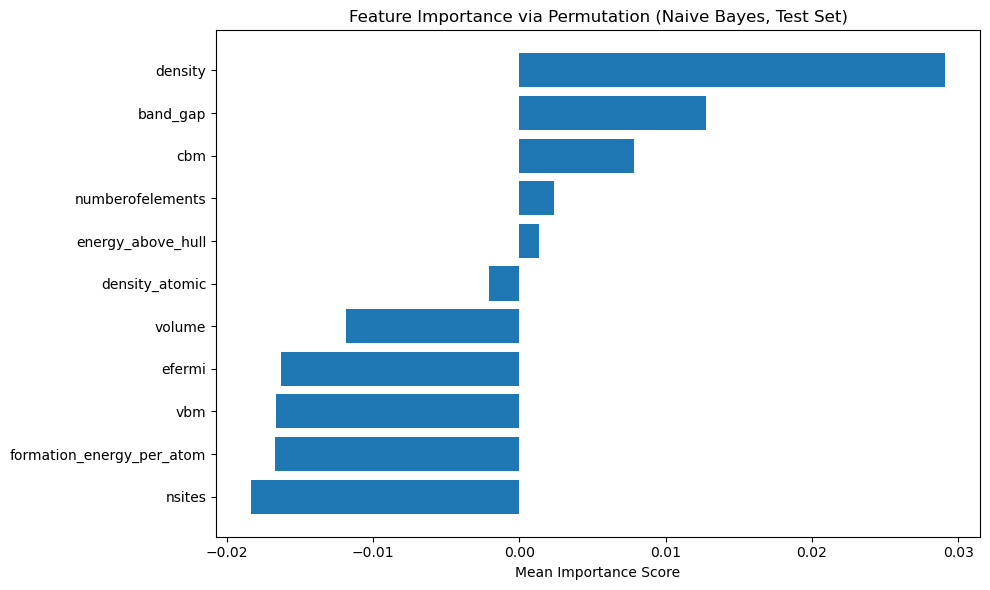

In [6]:

# Feature Importance (Permutation on Test Set)
perm = permutation_importance(model, X_test, y_test, n_repeats=15, random_state=42)
sorted_idx = perm.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm.importances_mean[sorted_idx])
plt.yticks(np.arange(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Mean Importance Score")
plt.title("Feature Importance via Permutation (Naive Bayes, Test Set)")
plt.tight_layout()
plt.show()
